In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_26 = pd.read_csv('20230126.csv')
df_27 = pd.read_csv('20230127.csv')
df_28 = pd.read_csv('20230128.csv')
df_29 = pd.read_csv('20230129.csv')

df_combined = pd.concat([df_26, df_27, df_28, df_29], ignore_index=True)
df_combined.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
df_combined.columns = df_combined.columns.str.lower().str.replace(' ', '_').str.replace(':', '')
df_combined.head(10)

,index,receive_time,device_id,device,device_name,platform,isp,itemname,itemid,appid,event
0,0,2023-01-26 20:02:59,D4:CF:F9:63:8C:23,BoxOTT,SEI500FPT,fplay-ottbox-sei-2020,fpt,VTV5 HD,vtv5-hd,IPTV,StartChannel
1,1,2023-01-26 20:02:59,D4:CF:F9:63:6B:C0,BoxOTT,SEI500FPT,fplay-ottbox-sei-2020,vnpt,VTV5 HD,vtv5-hd,IPTV,StartChannel
2,2,2023-01-26 20:02:59,F5AYANSVAEPIF,SmartTV,Samsung-2021,smarttv-ss-nextgen,vnpt,VTV4 HD,vtv4-hd,IPTV,StartChannel
3,3,2023-01-26 20:02:59,10:39:4E:8A:17:7E,BoxOTT,FHRT2X,fplay-ottbox-hisense-2022,vnpt,FPT Play,fpt-play,IPTV,StartChannel
4,4,2023-01-26 20:02:59,bf3b8fcf5ef5ddae,Mobile,OPPO CPH2179,Android - Normal,fpt,Ai Cũng Biết Em Yêu Anh,635c92a0b92a03f3c241fd5e,home,StartMovie
5,5,2023-01-26 20:02:59,10:39:4E:97:7B:FB,BoxOTT,FHRT2X,fplay-ottbox-hisense-2022,fpt,Kéo Cưa Lừa Xẻ,6269749f6aae0b0dbae6ed47,SEARCH,NextMovie
6,6,2023-01-26 20:02:59,5420110C-14B9-49F1-B4C8-97E0ABEF0728,Mobile,iPhone,IOS,viettel,Cổ Tay Áo Màu Đỏ - Tập 1B,6165b5fa2089bd0100ee493a,home,PrviousMovie
7,7,2023-01-26 20:02:59,D4:CF:F9:A1:49:73,BoxOTT,SEI500FPT,fplay-ottbox-sei-2020,fpt,VTV3 HD,vtv3-hd,IPTV,StartChannel
8,8,2023-01-26 20:03:00,10:39:4E:97:8C:4E,BoxOTT,FHRT2X,fplay-ottbox-hisense-2022,fpt,Hát Về Khủng Long,623c219d29b211757604ec2f,SEARCH,StartMovie
9,9,2023-01-26 20:03:00,127a51cf27e65414,SmartTvAndroid,BRAVIA_VU2,smarttv-sony-android,fpt,Blue Ant Extreme HD,blue-ant-extreme,IPTV,StartChannel


In [36]:
df_combined = df_combined.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
missing_values = df_combined.isnull().sum()
print(missing_values)
df_combined = df_combined.apply(lambda col: col.str.strip().replace(r'\s+', ' ', regex=True) if col.dtype == 'object' else col)

index               0
receive_time        0
device_id         179
device              0
device_name         1
platform            1
isp                 0
itemname         1364
itemid           1943
appid           57704
event               0
dtype: int64


In [18]:
missing_percentage = (df_combined.isnull().sum() / len(df_combined)) * 100
print(missing_percentage)

df_combined_cleaned = df_combined.dropna(subset=['device_id', 'device_name', 'platform', 'itemname', 'itemid', 'appid'])
print(f"Number of rows after dropping: {len(df_combined_cleaned)}")

missing_values_after_drop = df_combined_cleaned.isnull().sum()
print(missing_values_after_drop)

index           0.000000
receive_time    0.000000
device_id       0.004475
device          0.000000
device_name     0.000025
platform        0.000025
isp             0.000000
itemname        0.034100
itemid          0.048575
appid           1.442600
event           0.000000
dtype: float64
Number of rows after dropping: 3940057
index           0
receive_time    0
device_id       0
device          0
device_name     0
platform        0
isp             0
itemname        0
itemid          0
appid           0
event           0
dtype: int64


In [33]:
df_combined['receive_time'] = pd.to_datetime(df_combined['receive_time'])
print(df_combined.dtypes)

index                    int64
receive_time    datetime64[ns]
device_id               object
device                  object
device_name             object
platform                object
isp                     object
itemname                object
itemid                  object
appid                   object
event                   object
dtype: object


In [38]:
def selected_categorical_value_counts(df):
    columns_to_include = ['device_id', 'device', 'device_name', 'platform', 'isp', 'itemname', 'event']
    for column in columns_to_include:
        if column in df.columns:  
            counts = df[column].value_counts()
            percentages = df[column].value_counts(normalize=True) * 100
            result = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages})
            print(result)
            print("\n" + "="*50 + "\n")
selected_categorical_value_counts(df_combined)
df_combined = df_combined.apply(lambda col: col.str.replace(r'[^\w\s]', '', regex=True) if col.dtype == 'object' else col)

                                  Count  Percentage (%)
device_id                                              
D4CFF964D699                       1249        0.031226
D4CFF9A10A9D                       1194        0.029851
D4CFF95E8073                       1102        0.027551
D4CFF9A1685F                       1068        0.026701
D4CFF993694B                       1053        0.026326
...                                 ...             ...
7dce691da7771cda                      1        0.000025
226068661f88465d42c7e8725312f13f      1        0.000025
7849cb1f27e88534                      1        0.000025
4fef42ced89521f7                      1        0.000025
D4CFF992E599                          1        0.000025

[473947 rows x 2 columns]


                  Count  Percentage (%)
device                                 
BoxOTT          1832064       45.801600
SmartTvAndroid  1031585       25.789625
SmartTV          845246       21.131150
Mobile           255535        6.388375
Web

In [55]:
df_combined['receive_time'] = pd.to_datetime(df_combined['receive_time'])
df_combined['hour'] = df_combined['receive_time'].dt.hour
df_combined = df_combined.dropna(subset=['receive_time'])
usage_overview = df_combined['hour'].value_counts().reset_index().rename(columns={'index':'hour'}).sort_values(by='hour')
usage_overview.set_index('hour', inplace=True)

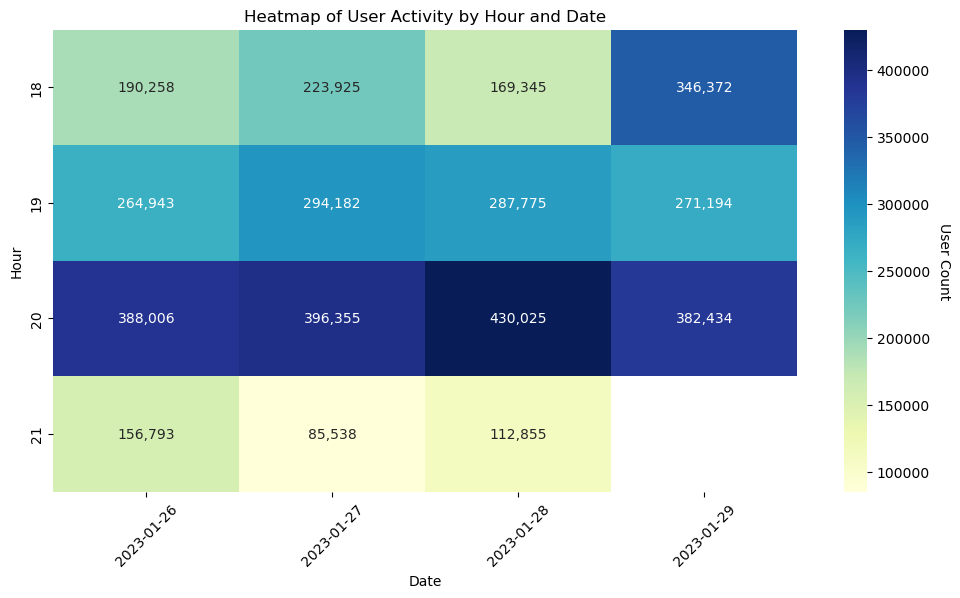

In [61]:
# Group by date and hour to count the number of occurrences.
df_combined['date'] = df_combined['receive_time'].dt.date
df_combined['hour'] = df_combined['receive_time'].dt.hour
df_grouped = df_combined.groupby(['date', 'hour']).size().reset_index(name='count')
pivot_table = df_grouped.pivot_table(index='hour', columns='date', values='count')

plt.figure(figsize=(12, 6))
ax = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=",.0f")  

# Adding descriptive labels and title
ax.set_title('Heatmap of User Activity by Hour and Date')
ax.set_xlabel('Date')
ax.set_ylabel('Hour')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Labeling the color bar
cbar = ax.collections[0].colorbar
cbar.set_label('User Count', rotation=270, labelpad=15)

plt.show()

In [64]:
# Count occurrences of each item (top content)
top_content = df_combined['itemname'].value_counts().reset_index().rename(columns={'index': 'Content', 'itemname': 'Views'})
print(top_content.head())
print(top_content.columns)  

            Views   count
0         VTV1 HD  549299
1         VTV3 HD  261812
2  Vĩnh Long 1 HD  214798
3  Vĩnh Long 3 HD  122153
4  Vĩnh Long 2 HD  110678
Index(['Views', 'count'], dtype='object')


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_9744/2945475509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Views', data=top_content.head(10), palette='viridis')


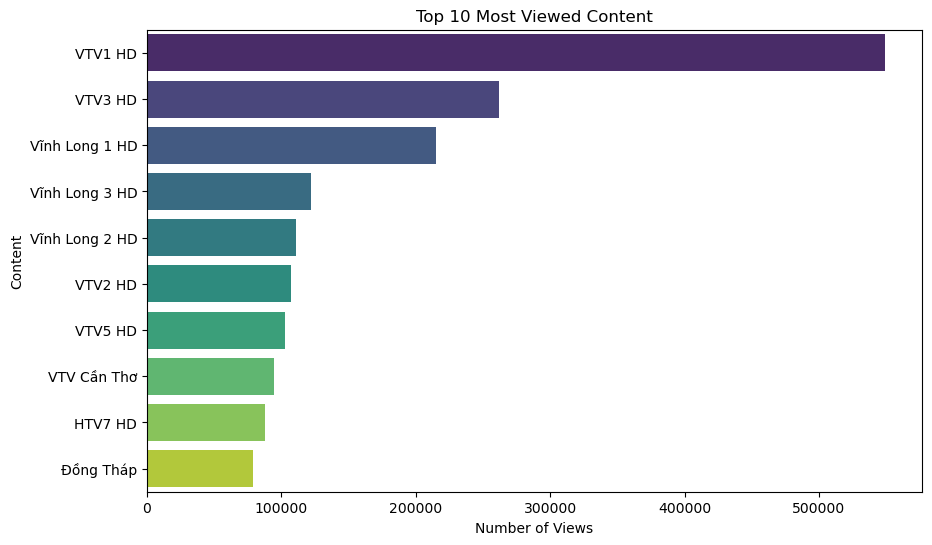

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='Views', data=top_content.head(10), palette='viridis')
plt.title('Top 10 Most Viewed Content')
plt.xlabel('Number of Views')
plt.ylabel('Content')
plt.show()

In [82]:
# Calculate Mostwatch
most_watched = df_combined.groupby(['device_id', 'itemname']).size().reset_index(name='view_count')
most_watched = most_watched.loc[most_watched.groupby('device_id')['view_count'].idxmax()]

# Calculate Totalview
total_views = df_combined.groupby('device_id').size().reset_index(name='total_views')

# Calculate Active Hour
df_combined['hour'] = df_combined['receive_time'].dt.hour
active_hour = df_combined.groupby(['device_id', 'hour']).size().reset_index(name='view_count')
active_hour = active_hour.loc[active_hour.groupby('device_id')['view_count'].idxmax()]

# Merge all results into the final user_behavior DataFrame
user_behavior = most_watched[['device_id', 'itemname']].merge(total_views, on='device_id')
user_behavior = user_behavior.merge(latest_view[['device_id', 'recency']], on='device_id')
user_behavior = user_behavior.merge(active_hour[['device_id', 'hour']], on='device_id', how='left')

# Adjust display settings to show all columns but limit the rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase width to prevent wrapping
pd.set_option('display.colheader_justify', 'left')  # Adjust header alignment for better readability

# Print a limited number of rows while showing all columns and reset index
print("Most Watched (First 10 rows):")
print(most_watched[['device_id', 'itemname', 'view_count']].head(10).reset_index(drop=True))

print("\nTotal Views (First 10 rows):")
print(total_views[['device_id', 'total_views']].head(10).reset_index(drop=True))

print("\nActive Hour (Most active hour per device) (First 10 rows):")
print(active_hour[['device_id', 'hour', 'view_count']].head(10).reset_index(drop=True))

print("\nUser Behavior Data (First 10 rows):")
print(user_behavior[['device_id', 'itemname', 'total_views', 'hour']].head(10).reset_index(drop=True))

Most Watched (First 10 rows):
  device_id                         itemname                            view_count
0                  00007b30687f8ee4                            VTV1 HD  4         
1  0000849a57b9d05c5cd41179cbd775d8                            VTV1 HD  2         
2                  000096ce1305985f  Em Là Thành Tri Doanh Luy Của Anh  6         
3                  00011c8dfe00494a                            VTV1 HD  1         
4                  0001259c2732a79b                       Vợ Thằng Đậu  1         
5  000230BFDB0E4A8AA377E0886DFEF23D                                 HD  1         
6                  0002428362169864                     Vĩnh Long 1 HD  1         
7                  0002be5817c3e141                            VTC3 HD  1         
8  000380D52624414EB349FCE7C8C5CFBD   Học Viện Anh Hùng Phần 4  Tập 13  1         
9  0003a2217d5d295a5ed4b1e5d09673ef                           FPT Play  1         

Total Views (First 10 rows):
  device_id                

In [86]:
# Extract hour of day
df_combined['hour'] = df_combined['receive_time'].dt.hour

# List of known platforms that should not be in 'itemname'
platforms = ['FPT Play', 'VTV Go', 'SmartTV', 'Mobile', 'BoxOTT']  # Add any other known platforms here

# Filter out rows where 'itemname' contains platform names
df_cleaned = df_combined[~df_combined['itemname'].isin(platforms)]

# Group by hour and content type (itemname), count occurrences, and sort by count
content_by_hour_cleaned = df_cleaned.groupby(['hour', 'itemname']).size().reset_index(name='count')

# Top 10 most-watched content by hour
top10_content_by_hour_cleaned = content_by_hour_cleaned.groupby('hour').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Pivot table
pivot_table_cleaned = top10_content_by_hour_cleaned.pivot_table(index='itemname', columns='hour', values='count', fill_value=0)

# Add a total count column and sort by the total in descending order
pivot_table_cleaned['total'] = pivot_table_cleaned.sum(axis=1)
pivot_table_cleaned_sorted = pivot_table_cleaned.sort_values(by='total', ascending=False).drop(columns='total')

# Print the sorted pivot table
print(pivot_table_cleaned_sorted)

hour               18        19        20        21     
itemname                                                
HTV7 HD             26694.0       0.0   32653.0   7279.0
Hà Nội  Hải Phòng   35525.0       0.0       0.0      0.0
Hậu Giang           26815.0       0.0       0.0      0.0
VTV Cần Thơ             0.0   24532.0   41387.0   8577.0
VTV1 HD            176936.0  177892.0  158478.0  35993.0
VTV2 HD                 0.0   29005.0   46491.0  10106.0
VTV3 HD             49769.0   63881.0  117431.0  30731.0
VTV4 HD                 0.0       0.0   33085.0      0.0
VTV5 HD             21900.0   27116.0   44043.0   9292.0
Vĩnh Long 1 HD      36283.0   70810.0   92683.0  15022.0
Vĩnh Long 2 HD      24513.0   30221.0   44965.0  10979.0
Vĩnh Long 3 HD      22442.0   39165.0   49189.0  11357.0
Vĩnh Long 4 HD          0.0   21353.0       0.0   7435.0
Đồng Tháp           21682.0   23350.0       0.0      0.0


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_9744/2722518091.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_content_by_hour_cleaned = content_by_hour_cleaned.groupby('hour').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


In [89]:
# Group by device and content type (itemname) and count occurrences
content_by_device = df_combined.groupby(['device', 'itemname']).size().reset_index(name='count')

# For each device, find the top N most-watched content (e.g., N=5)
topN_content_by_device = content_by_device.groupby('device').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Print the top N content by device
print(topN_content_by_device.sort_values(by=['device', 'count'], ascending=[True, False]))

   device          itemname                                      count 
0           BoxOTT                                      VTV1 HD  252013
1           BoxOTT                                      VTV3 HD  159178
2           BoxOTT                               Vĩnh Long 1 HD   79943
3           BoxOTT                                      VTV2 HD   69996
4           BoxOTT                                      VTV5 HD   69775
5           Mobile                                      VTV1 HD   12380
6           Mobile                               Vĩnh Long 1 HD    7689
7           Mobile                              Hướng Gió Mà Đi    5934
8           Mobile                            Hà Nội  Hải Phòng    5532
9           Mobile                               Vĩnh Long 3 HD    3666
10         SmartTV                                      VTV1 HD  159163
11         SmartTV                               Vĩnh Long 1 HD   53627
12         SmartTV                                      VTV3 HD 

/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_9744/2879684208.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  topN_content_by_device = content_by_device.groupby('device').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


   isp      itemname            count 
0       fpt            VTV1 HD  302214
1       fpt            VTV3 HD  188291
2       fpt     Vĩnh Long 1 HD   91689
3       fpt            VTV2 HD   77766
4       fpt            VTV5 HD   74618
5     other            VTV1 HD    6256
6     other     Vĩnh Long 1 HD    2758
7     other            VTV3 HD    1753
8     other  Hà Nội  Hải Phòng    1662
9     other     Vĩnh Long 3 HD    1198
10      spt            VTV1 HD     647
11      spt            VTV3 HD     307
12      spt            HTV9 HD     259
13      spt            HTV7 HD     150
14      spt     Vĩnh Long 1 HD      67
15  viettel            VTV1 HD  127149
16  viettel     Vĩnh Long 1 HD   67233
17  viettel     Vĩnh Long 3 HD   37885
18  viettel            VTV3 HD   37291
19  viettel     Vĩnh Long 2 HD   34968
20     vnpt            VTV1 HD  113033
21     vnpt     Vĩnh Long 1 HD   53051
22     vnpt            VTV3 HD   34170
23     vnpt     Vĩnh Long 3 HD   30286
24     vnpt     Vĩnh Long

/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_9744/1319239172.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_content_by_isp = content_by_isp.groupby('isp').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


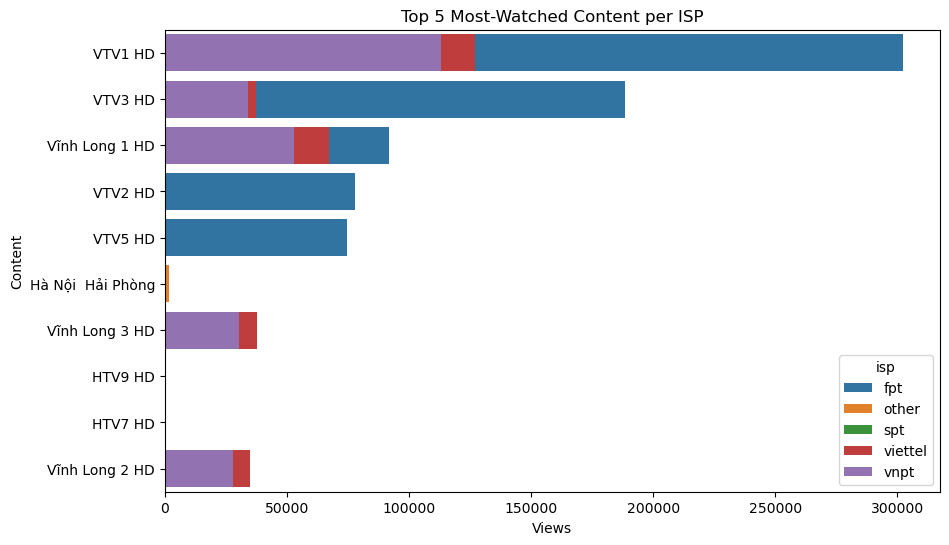

In [93]:
content_by_isp = df_combined.groupby(['isp', 'itemname']).size().reset_index(name='count')
top5_content_by_isp = content_by_isp.groupby('isp').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
print(top5_content_by_isp.sort_values(by=['isp', 'count'], ascending=[True, False]))

# Plot a bar chart for the top 5 content per ISP
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='itemname', hue='isp', data=top5_content_by_isp, dodge=False)
plt.title('Top 5 Most-Watched Content per ISP')
plt.xlabel('Views')
plt.ylabel('Content')
plt.show()

   isp      device           count  
0       fpt          BoxOTT  1442388
1       fpt  SmartTvAndroid   342964
2       fpt         SmartTV   332543
3       fpt          Mobile    58321
4       fpt           WebOS    10444
5     other          Mobile    16284
6     other          BoxOTT    12857
7     other  SmartTvAndroid    12354
8     other         SmartTV     8482
9     other           WebOS     1242
10      spt          BoxOTT     1465
11      spt  SmartTvAndroid      635
12      spt         SmartTV      590
13      spt          Mobile      539
14      spt           WebOS       44
15  viettel  SmartTvAndroid   366583
16  viettel         SmartTV   279551
17  viettel          BoxOTT   195769
18  viettel          Mobile    97142
19  viettel           WebOS    11178
20     vnpt  SmartTvAndroid   309049
21     vnpt         SmartTV   224080
22     vnpt          BoxOTT   179585
23     vnpt          Mobile    83249
24     vnpt           WebOS    12662


/var/folders/2x/9rs4qchj3q59kj_wgvclvld00000gn/T/ipykernel_9744/494346794.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_devices_by_isp = device_by_isp.groupby('isp').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


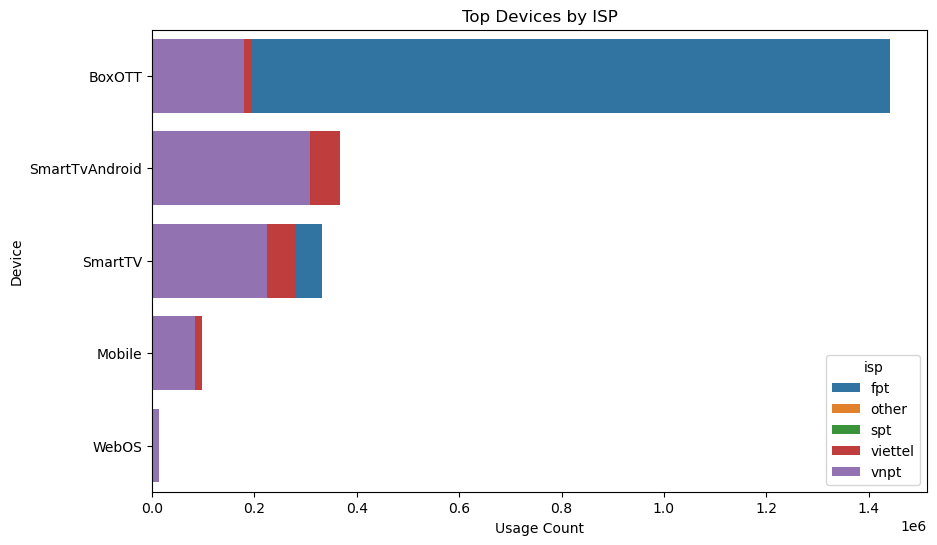

In [94]:
device_by_isp = df_combined.groupby(['isp', 'device']).size().reset_index(name='count')
top_devices_by_isp = device_by_isp.groupby('isp').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
print(top_devices_by_isp.sort_values(by=['isp', 'count'], ascending=[True, False]))

# Plot a bar chart for top devices by ISP
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='device', hue='isp', data=top_devices_by_isp, dodge=False)
plt.title('Top Devices by ISP')
plt.xlabel('Usage Count')
plt.ylabel('Device')
plt.show()

  isp       total_engagement
0      fpt  2186660         
3  viettel   950223         
4     vnpt   808625         
1    other    51219         
2      spt     3273         


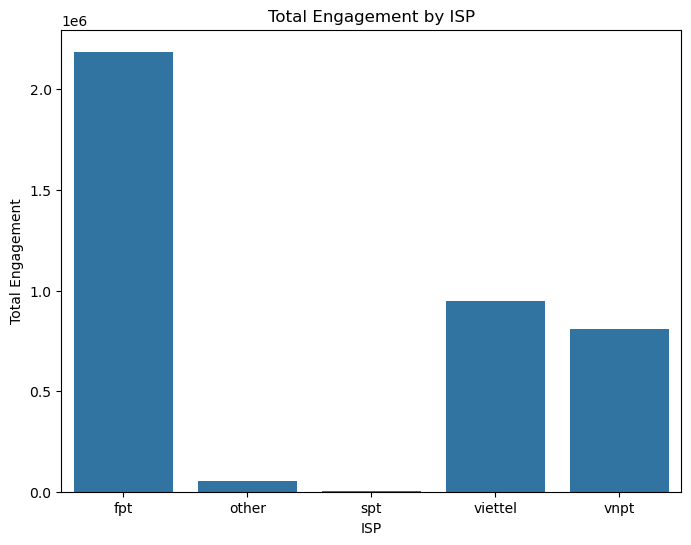

In [95]:
engagement_by_isp = df_combined.groupby('isp').size().reset_index(name='total_engagement')
engagement_by_isp_sorted = engagement_by_isp.sort_values(by='total_engagement', ascending=False)
print(engagement_by_isp_sorted)

# Plot a bar chart for total engagement per ISP
plt.figure(figsize=(8, 6))
sns.barplot(x='isp', y='total_engagement', data=engagement_by_isp)
plt.title('Total Engagement by ISP')
plt.xlabel('ISP')
plt.ylabel('Total Engagement')
plt.show()

In [103]:
# Sort by device_id and receive_time to ensure chronological order for each device
df_combined_sorted = df_combined.sort_values(by=['device_id', 'receive_time'])

# Create a next_event column by shifting the event column upward by 1
df_combined_sorted['next_event'] = df_combined_sorted.groupby('device_id')['event'].shift(-1)

# Group by event and next_event to count occurrences of each transition
event_transitions = df_combined_sorted.groupby(['event', 'next_event']).size().reset_index(name='count', drop=False)
common_pathways = event_transitions.sort_values(by='count', ascending=False).head(10).reset_index(drop=True)

# Print the result
print(common_pathways)

  event          next_event      count  
0   StartChannel   StartChannel  2971776
1     StartMovie     StartMovie   192709
2      NextMovie      NextMovie   115110
3     StartMovie      NextMovie    65791
4      NextMovie     StartMovie    44562
5   StartChannel     StartMovie    33702
6     StartMovie   StartChannel    30224
7  StartLiveShow  StartLiveShow    11048
8   StartTrailer     StartMovie     9678
9      NextMovie   StartChannel     7165


In [104]:
device_id_to_check = 'D4CFF964D699'
df_device = df_combined_sorted[df_combined_sorted['device_id'] == device_id_to_check]
df_device_reset = df_device.reset_index(drop=True)
print(df_device_reset[['receive_time', 'event', 'next_event']].head(20))  

   receive_time        event         next_event   
0  2023-01-26 18:02:45  StartChannel  StartChannel
1  2023-01-26 18:02:58  StartChannel  StartChannel
2  2023-01-26 18:08:01  StartChannel  StartChannel
3  2023-01-26 18:08:51  StartChannel  StartChannel
4  2023-01-26 18:08:56  StartChannel  StartChannel
5  2023-01-26 18:29:55  StartChannel  StartChannel
6  2023-01-26 19:00:56  StartChannel  StartChannel
7  2023-01-26 19:01:07  StartChannel  StartChannel
8  2023-01-26 19:01:24  StartChannel  StartChannel
9  2023-01-26 19:01:27  StartChannel  StartChannel
10 2023-01-26 19:01:28  StartChannel  StartChannel
11 2023-01-26 19:01:30  StartChannel  StartChannel
12 2023-01-26 19:02:30  StartChannel  StartChannel
13 2023-01-26 19:02:32  StartChannel  StartChannel
14 2023-01-26 19:02:39  StartChannel  StartChannel
15 2023-01-26 19:02:51  StartChannel  StartChannel
16 2023-01-26 19:03:02  StartChannel  StartChannel
17 2023-01-26 19:03:06  StartChannel  StartChannel
18 2023-01-26 19:03:07  StartCh